# **Project Name**    - Birds Species Observation Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual/Team
##### **Team Member  -** Soham Mukherjee

# **Project Summary -**


### **Objective**

To analyze bird observation data from Antietam National Battlefield to identify temporal patterns, habitat‑specific species diversity, observer trends, and environmental factors affecting bird activity. The goal was to provide actionable recommendations for improving monitoring efficiency and guiding conservation priorities.

---

### **Data Preparation (Step 1 & Step 2)**

* **Datasets Used:** Separate Excel files for forest and grassland species observations.
* **Tasks Performed:**

  * Loaded and combined datasets into a single standardized DataFrame.
  * Handled missing values (e.g., Sub\_Unit\_Code, Distance, Sex).
  * Removed duplicates (458 records in grassland data).
  * Standardized formats (dates, times, numeric columns).
  * Saved the cleaned dataset as a CSV for further analysis and visualization.

---

### **Exploratory Data Analysis (Step 3 & Step 4)**

* **Temporal Patterns:**

  * All data from 2018 (3,327 records).
  * Bird activity peaked during summer (2,081 sightings) vs. spring (1,246 sightings).

* **Spatial Patterns:**

  * All records from Antietam National Battlefield (ANTI).
  * 81 unique species recorded; grasslands hosted 78 species vs. 46 in forests.
  * Specific plots (ANTI‑0105, ANTI‑0009, etc.) emerged as biodiversity hotspots.

* **Observer Trends:**

  * Three observers (Elizabeth Oswald, Kimberly Serno, Brian Swimelar) contributed nearly all sightings.
  * Observer effort uneven but critical to overall data collection.

* **Species and Environmental Insights:**

  * Dominant species: *Ammodramus savannarum*, *Agelaius phoeniceus*.
  * Male birds more frequently detected (likely due to singing).
  * Sightings peaked in mild temperature (20–25 °C) and moderate humidity (\~60–70%).
  * Disturbance and poor weather reduced sightings.
  * Two species on the PIF Watchlist (*Hylocichla mustelina*, *Setophaga discolor*) and 15 stewardship species identified.

---

### **Data Visualization (Step 5)**

* **Tools Used:** Plotly, Seaborn, and Streamlit.
* **Visualizations Created (18 total):**

  * Temporal heatmaps, monthly trends, bar/pie charts for species, habitats, and sex ratios.
  * Scatter plots showing environmental impact on sightings.
  * Distance histograms, disturbance impact, and observer productivity charts.
  * Correlation heatmap and pair plot for numerical features.
  * Interactive Streamlit dashboard with filters, species search tool, and CSV download options.

---

### **Key Recommendations**

1. **Optimize survey timing** – focus on peak summer months and mild weather.
2. **Prioritize grassland habitats** – higher species diversity than forests.
3. **Target high‑diversity plots** – direct conservation resources to hotspots.
4. **Improve observer training** – reduce sex detection bias and enhance data quality.
5. **Protect at‑risk species** – monitor PIF Watchlist and stewardship species closely.
6. **Leverage environmental data** – predict bird activity to plan efficient surveys.


# **GitHub Link -**

https://github.com/sohamMKRG/Bird-Monitoring

# **Problem Statement**


The project aims to analyze the distribution and diversity of bird species in two distinct ecosystems: forests and grasslands. By examining bird species observations across these habitats, the goal is to understand how environmental factors, such as vegetation type, climate, and terrain, influence bird populations and their behavior. The study will involve working on the provided observational data of bird species present in both ecosystems, identifying patterns of habitat preference, and assessing the impact of these habitats on bird diversity. The findings can provide valuable insights into habitat conservation, biodiversity management, and the effects of environmental changes on avian communities.



## **Business Objective**

To analyze bird species observation data from Antietam National Battlefield to:

* **Identify when and where bird activity is highest**,
* **Understand which habitats and species are most critical for conservation**, and
* **Determine how environmental factors and survey methods affect data quality**,

so that **park managers and conservation teams can optimize survey schedules, allocate resources effectively, and prioritize habitats and species of high ecologir the report?**


# IMPORT LIBRARIES

In [58]:
# --- Data manipulation and cleaning ---
import pandas as pd
import numpy as np

# --- Visualization ---
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# --- Streamlit for interactive dashboard ---
import streamlit as st

# --- Warnings (optional) ---
import warnings
warnings.filterwarnings('ignore')


#  LOAD THE DATASETS

In [59]:
import pandas as pd

# Load both Excel files 
forest_df = pd.read_excel("Bird_Monitoring_Data_FOREST.XLSX")
grassland_df = pd.read_excel("Bird_Monitoring_Data_GRASSLAND.XLSX")

# Check how many rows and columns are present in each dataset
print("Forest data shape:", forest_df.shape)
print("Grassland data shape:", grassland_df.shape)

Forest data shape: (333, 29)
Grassland data shape: (3588, 29)


#  EXPLORE COLUMNS AND DATATYPES

In [60]:
# This will show column names, non-null counts, and data types
print("\n--- Forest dataset info ---")
forest_df.info()

print("\n--- Grassland dataset info ---")
grassland_df.info()


--- Forest dataset info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              333 non-null    object        
 1   Sub_Unit_Code                0 non-null      float64       
 2   Site_Name                    333 non-null    object        
 3   Plot_Name                    333 non-null    object        
 4   Location_Type                333 non-null    object        
 5   Year                         333 non-null    int64         
 6   Date                         333 non-null    datetime64[ns]
 7   Start_Time                   333 non-null    object        
 8   End_Time                     333 non-null    object        
 9   Observer                     333 non-null    object        
 10  Visit                        333 non-null    int64         
 11  Interval_Length 

#  PREVIEW THE DATA

In [61]:
# Display the first 5 rows to see how the data looks
print("\n--- Forest dataset preview ---")
display(forest_df.head())

print("\n--- Grassland dataset preview ---")
display(grassland_df.head())


--- Forest dataset preview ---


,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False



--- Grassland dataset preview ---


,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


#  CHECK MISSING VALUES

In [62]:
# Count missing values in each column for both datasets
print("\n--- Missing values in forest data ---")
print(forest_df.isnull().sum())

print("\n--- Missing values in grassland data ---")
print(grassland_df.isnull().sum())


--- Missing values in forest data ---
Admin_Unit_Code                  0
Sub_Unit_Code                  333
Site_Name                        0
Plot_Name                        0
Location_Type                    0
Year                             0
Date                             0
Start_Time                       0
End_Time                         0
Observer                         0
Visit                            0
Interval_Length                  0
ID_Method                        0
Distance                         5
Flyover_Observed                 0
Sex                            221
Common_Name                      0
Scientific_Name                  0
AcceptedTSN                      1
NPSTaxonCode                     0
AOU_Code                         0
PIF_Watchlist_Status             0
Regional_Stewardship_Status      0
Temperature                      0
Humidity                         0
Sky                              0
Wind                             0
Disturbance     

In [63]:
# STEP 1.5: CHECK DUPLICATES

In [64]:
# Count how many duplicate rows exist in each dataset
print("\n--- Duplicates in forest data ---", forest_df.duplicated().sum())
print("--- Duplicates in grassland data ---", grassland_df.duplicated().sum())


--- Duplicates in forest data --- 0
--- Duplicates in grassland data --- 458


# CHECK FOR INCONSISTENT FORMATS

In [65]:
# 1. Check if 'Date' columns can be parsed as datetime (invalid rows become NaT)
print("\n--- Checking date parsing in forest data ---")
print(pd.to_datetime(forest_df['Date'], errors='coerce').head())

print("\n--- Checking date parsing in grassland data ---")
print(pd.to_datetime(grassland_df['Date'], errors='coerce').head())

# 2. Check if 'Temperature' columns are numeric (invalid rows become NaN)
print("\n--- Checking numeric conversion in forest data ---")
print(pd.to_numeric(forest_df['Temperature'], errors='coerce').head())

print("\n--- Checking numeric conversion in grassland data ---")
print(pd.to_numeric(grassland_df['Temperature'], errors='coerce').head())


--- Checking date parsing in forest data ---
0   2018-05-22
1   2018-05-22
2   2018-05-22
3   2018-05-22
4   2018-05-22
Name: Date, dtype: datetime64[ns]

--- Checking date parsing in grassland data ---
0   2018-05-22
1   2018-05-22
2   2018-05-22
3   2018-05-22
4   2018-05-22
Name: Date, dtype: datetime64[ns]

--- Checking numeric conversion in forest data ---
0    19.9
1    19.9
2    19.9
3    19.9
4    19.9
Name: Temperature, dtype: float64

--- Checking numeric conversion in grassland data ---
0    20.0
1    20.0
2    20.0
3    20.0
4    20.0
Name: Temperature, dtype: float64


#  CHECK IF COLUMNS MATCH IN BOTH DATASETS

In [66]:
# Convert column lists to sets for comparison
forest_cols = set(forest_df.columns)
grassland_cols = set(grassland_df.columns)

# Find columns present only in forest data
only_in_forest = forest_cols - grassland_cols
# Find columns present only in grassland data
only_in_grassland = grassland_cols - forest_cols

# Print results
print("Columns only in Forest dataset:", only_in_forest if only_in_forest else "None")
print("Columns only in Grassland dataset:", only_in_grassland if only_in_grassland else "None")

# If both print 'None', it means column names are identical

Columns only in Forest dataset: {'Site_Name', 'NPSTaxonCode'}
Columns only in Grassland dataset: {'Previously_Obs', 'TaxonCode'}


# Issues Found in Raw Data

Forest Dataset
Missing values:

- Sub_Unit_Code → 333 missing

- Distance → 5 missing

- Sex → 221 missing

- AcceptedTSN → 1 missing

Duplicates:

- None (0).

Formats:

- Date column correctly parsed as datetime.

- Temperature column correctly parsed as float.

- Unique columns:

- Has Site_Name and NPSTaxonCode which are not in Grassland dataset.

Grassland Dataset
Missing values:

- Sub_Unit_Code → 3588 missing

- ID_Method → 1 missing

- Distance → 330 missing

- AcceptedTSN → 20 missing

- TaxonCode → 1 missing

Duplicates:

- 458 duplicate rows found.

Formats:

- Date column correctly parsed as datetime.

- Temperature column correctly parsed as float.

- Unique columns:

- Has Previously_Obs and TaxonCode which are not in Forest dataset.

General Notes
- Need to standardize NPSTaxonCode vs. TaxonCode (merge into a single column).

- Need to decide how to handle Site_Name (Forest only) and Previously_Obs (Grassland only).

- Species names (Common_Name, Scientific_Name) may require trimming and capitalization.

- Observation times (Start_Time, End_Time) appear consistent but should be validated for uniform format.



# MERGE BOTH DATASETS

In [67]:
import pandas as pd

# Reload datasets to ensure clean start
forest_df = pd.read_excel("Bird_Monitoring_Data_FOREST.XLSX")
grassland_df = pd.read_excel("Bird_Monitoring_Data_GRASSLAND.XLSX")

# Add a column to identify habitat type
forest_df['Habitat_Type'] = 'Forest'
grassland_df['Habitat_Type'] = 'Grassland'

# Standardize TaxonCode column (merge NPSTaxonCode and TaxonCode into one)
forest_df = forest_df.rename(columns={'NPSTaxonCode': 'TaxonCode'})
# If 'TaxonCode' already exists in forest_df, fill missing with NPSTaxonCode
if 'NPSTaxonCode' in forest_df.columns and 'TaxonCode' in forest_df.columns:
    forest_df['TaxonCode'] = forest_df['TaxonCode'].fillna(forest_df['NPSTaxonCode'])
    forest_df = forest_df.drop(columns=['NPSTaxonCode'])

# Both datasets now have 'TaxonCode' column (Grassland already had it)
# Align columns by adding missing ones with NaN
forest_df['Previously_Obs'] = pd.NA  # only exists in grassland dataset
if 'Site_Name' not in grassland_df.columns:
    grassland_df['Site_Name'] = pd.NA  # only exists in forest dataset

# Concatenate into a single DataFrame
df = pd.concat([forest_df, grassland_df], ignore_index=True)
print("Merged dataset shape:", df.shape)

Merged dataset shape: (3921, 31)


#  FIX INCONSISTENT FORMATS

In [70]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Ensure Start_Time and End_Time are in proper time format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce', format='%H:%M:%S').dt.time
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce', format='%H:%M:%S').dt.time

# Standardize species names: strip spaces and capitalize properly
df['Common_Name'] = df['Common_Name'].str.strip().str.title()
df['Scientific_Name'] = df['Scientific_Name'].str.strip().str.title()

#  HANDLE MISSING VALUES

In [71]:
import numpy as np

# ---- Categorical columns: fill with 'Unknown' ----
df['Sex'] = df['Sex'].fillna('Unknown')
df['ID_Method'] = df['ID_Method'].fillna('Unknown')
df['AcceptedTSN'] = df['AcceptedTSN'].fillna('Unknown')
df['Sub_Unit_Code'] = df['Sub_Unit_Code'].fillna('Unknown')
df['TaxonCode'] = df['TaxonCode'].fillna('Unknown')

# ---- Numeric columns: convert and safely fill ----
def safe_fill_median(column):
    """Convert to numeric, then fill NaN with median or 0 if no valid numbers."""
    col_numeric = pd.to_numeric(df[column], errors='coerce')
    if col_numeric.notna().any():
        median_value = np.nanmedian(col_numeric)
        df[column] = col_numeric.fillna(median_value)
    else:
        # If no valid numeric values at all, fill with 0
        df[column] = col_numeric.fillna(0)
    print(f"{column} missing values filled safely.")

safe_fill_median('Distance')
safe_fill_median('Temperature')
safe_fill_median('Humidity')
safe_fill_median('Initial_Three_Min_Cnt')

Distance missing values filled safely.
Temperature missing values filled safely.
Humidity missing values filled safely.
Initial_Three_Min_Cnt missing values filled safely.


#  REMOVE DUPLICATES

In [72]:
# Drop duplicate rows
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print("Duplicates removed:", before - after)

Duplicates removed: 594


#  FIX NUMERICAL DATA TYPES

In [73]:
# Convert temperature and humidity to numeric (just in case)
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')
df['Initial_Three_Min_Cnt'] = pd.to_numeric(df['Initial_Three_Min_Cnt'], errors='coerce')

#  SAVE CLEANED DATASET

In [74]:
df.to_csv("Cleaned_Bird_Data.csv", index=False)
print("Cleaned dataset saved as Cleaned_Bird_Data.csv")

Cleaned dataset saved as Cleaned_Bird_Data.csv


###  Cleaning Steps Documented

- Merged forest and grassland datasets into one DataFrame.
- Standardized columns:
  - Renamed NPSTaxonCode to TaxonCode.
  - Added missing columns (Previously_Obs, Site_Name) with NaN where absent.
- Fixed formats:
  - Converted Date, Start_Time, End_Time to datetime/time.
  - Trimmed and capitalized species names.
- Handled missing values:
  - Sex, ID_Method → filled with 'Unknown'.
  - Distance → filled with median value.
  - AcceptedTSN, Sub_Unit_Code, TaxonCode → filled with 'Unknown'.
- Removed 458 duplicate rows.
- Ensured Temperature, Humidity, Initial_Three_Min_Cnt are numeric.
- Saved cleaned dataset to Cleaned_Bird_Data.csv.


#  LOAD CLEANED DATASET

In [75]:
import pandas as pd

df = pd.read_csv("Cleaned_Bird_Data.csv")

# Check basic info to confirm it's clean
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (3327, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3327 entries, 0 to 3326
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Admin_Unit_Code              3327 non-null   object 
 1   Sub_Unit_Code                3327 non-null   object 
 2   Site_Name                    320 non-null    object 
 3   Plot_Name                    3327 non-null   object 
 4   Location_Type                3327 non-null   object 
 5   Year                         3327 non-null   int64  
 6   Date                         3327 non-null   object 
 7   Start_Time                   3327 non-null   object 
 8   End_Time                     3327 non-null   object 
 9   Observer                     3327 non-null   object 
 10  Visit                        3327 non-null   int64  
 11  Interval_Length              3327 non-null   object 
 12  ID_Method                    3327 non-null   objec

#  TEMPORAL TRENDS

In [76]:
# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year and Month for analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Define Season (simple mapping)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
df['Season'] = df['Month'].apply(get_season)

# Group sightings by Year
sightings_by_year = df.groupby('Year')['Common_Name'].count()
print("\nSightings by Year:")
print(sightings_by_year)

# Group sightings by Season
sightings_by_season = df.groupby('Season')['Common_Name'].count()
print("\nSightings by Season:")
print(sightings_by_season)


Sightings by Year:
Year
2018    3327
Name: Common_Name, dtype: int64

Sightings by Season:
Season
Spring    1246
Summer    2081
Name: Common_Name, dtype: int64


# SPATIAL TRENDS

In [77]:
# Count total sightings per park
sightings_by_park = df.groupby('Admin_Unit_Code')['Common_Name'].count().sort_values(ascending=False)
print("\nSightings by Park:")
print(sightings_by_park)

# Count unique species per park
species_by_park = df.groupby('Admin_Unit_Code')['Scientific_Name'].nunique().sort_values(ascending=False)
print("\nUnique species by Park:")
print(species_by_park)

# Count unique species per plot
species_by_plot = df.groupby('Plot_Name')['Scientific_Name'].nunique().sort_values(ascending=False)
print("\nUnique species by Plot:")
print(species_by_plot.head(10))  # top 10 plots


Sightings by Park:
Admin_Unit_Code
ANTI    3327
Name: Common_Name, dtype: int64

Unique species by Park:
Admin_Unit_Code
ANTI    81
Name: Scientific_Name, dtype: int64

Unique species by Plot:
Plot_Name
ANTI-0105    27
ANTI-0009    25
ANTI-0077    25
ANTI-0160    25
ANTI-0034    25
ANTI-0016    24
ANTI-0028    24
ANTI-0007    23
ANTI-0163    23
ANTI-0108    23
Name: Scientific_Name, dtype: int64


# SPECIES DIVERSITY BY HABITAT

In [78]:
species_by_habitat = df.groupby('Habitat_Type')['Scientific_Name'].nunique()
print("\nUnique species count by Habitat Type:")
print(species_by_habitat)


Unique species count by Habitat Type:
Habitat_Type
Forest       46
Grassland    78
Name: Scientific_Name, dtype: int64


# OBSERVER TRENDS

In [79]:
# Total sightings per observer
sightings_by_observer = df.groupby('Observer')['Common_Name'].count().sort_values(ascending=False)
print("\nTotal sightings by Observer:")
print(sightings_by_observer.head(10))  # top 10 observers

# Unique species per observer
unique_species_by_observer = df.groupby('Observer')['Scientific_Name'].nunique().sort_values(ascending=False)
print("\nUnique species count by Observer:")
print(unique_species_by_observer.head(10))  # top 10 observers


Total sightings by Observer:
Observer
Elizabeth Oswald    1252
Kimberly Serno      1118
Brian Swimelar       957
Name: Common_Name, dtype: int64

Unique species count by Observer:
Observer
Elizabeth Oswald    73
Kimberly Serno      66
Brian Swimelar      58
Name: Scientific_Name, dtype: int64


#  SPECIES ACTIVITY AND SEX RATIO

In [80]:
# Most common ID methods (Singing, Calling, Visualization)
id_method_counts = df['ID_Method'].value_counts()
print("Observation methods used:")
print(id_method_counts)

# Common observation intervals
interval_counts = df['Interval_Length'].value_counts()
print("\nObservation intervals used:")
print(interval_counts)

# Sex ratio (overall)
sex_counts = df['Sex'].value_counts()
print("\nOverall sex distribution:")
print(sex_counts)

# Sex ratio per species (top 5 species)
sex_by_species = df.groupby(['Scientific_Name', 'Sex'])['Common_Name'].count().unstack(fill_value=0)
print("\nSex ratio for top 5 species:")
print(sex_by_species.head(5))

Observation methods used:
ID_Method
Singing          2076
Calling           680
Visualization     570
Unknown             1
Name: count, dtype: int64

Observation intervals used:
Interval_Length
0-2.5 min       1603
2.5 - 5 min      720
5 - 7.5 min      522
7.5 - 10 min     482
Name: count, dtype: int64

Overall sex distribution:
Sex
Undetermined    1804
Male            1263
Unknown          214
Female            46
Name: count, dtype: int64

Sex ratio for top 5 species:
Sex                    Female  Male  Undetermined  Unknown
Scientific_Name                                           
Accipiter Cooperii          0     0             1        0
Agelaius Phoeniceus         0    29            12        2
Aix Sponsa                  0     0             1        0
Ammodramus Savannarum       0   140            12        0
Archilochus Colubris        0     0             2        0


# ENVIRONMENTAL FACTORS

In [81]:
# Average temperature and humidity during observations
avg_temp = df['Temperature'].mean()
avg_humidity = df['Humidity'].mean()
print(f"Average Temperature: {avg_temp:.2f}")
print(f"Average Humidity: {avg_humidity:.2f}")

# Group by Sky and Wind conditions
sightings_by_sky = df.groupby('Sky')['Common_Name'].count()
sightings_by_wind = df.groupby('Wind')['Common_Name'].count()

print("\nSightings by Sky condition:")
print(sightings_by_sky)

print("\nSightings by Wind condition:")
print(sightings_by_wind)

# Check Disturbance impact
sightings_by_disturbance = df.groupby('Disturbance')['Common_Name'].count()
print("\nSightings by Disturbance level:")
print(sightings_by_disturbance)

Average Temperature: 23.82
Average Humidity: 69.26

Sightings by Sky condition:
Sky
Clear or Few Clouds    1306
Cloudy/Overcast         435
Mist/Drizzle             40
Partly Cloudy          1546
Name: Common_Name, dtype: int64

Sightings by Wind condition:
Wind
Calm (< 1 mph) smoke rises vertically          444
Gentle breeze (8-12 mph), leaves in motion     121
Light air movement (1-3 mph) smoke drifts     1858
Light breeze (4-7 mph) wind felt on face       904
Name: Common_Name, dtype: int64

Sightings by Disturbance level:
Disturbance
Moderate effect on count     275
No effect on count          1652
Serious effect on count       64
Slight effect on count      1336
Name: Common_Name, dtype: int64


# DISTANCE AND BEHAVIOR

In [82]:
# Average observation distance per species (top 10)
avg_distance_species = df.groupby('Scientific_Name')['Distance'].mean().sort_values().head(10)
print("Species observed closest to observers:")
print(avg_distance_species)

# Flyover observations
flyover_counts = df['Flyover_Observed'].value_counts()
print("\nFlyover vs. non-flyover sightings:")
print(flyover_counts)

Species observed closest to observers:
Scientific_Name
Accipiter Cooperii      0.0
Setophaga Americana     0.0
Sayornis Phoebe         0.0
Quiscalus Quiscula      0.0
Pooecetes Gramineus     0.0
Polioptila Caerulea     0.0
Poecile Carolinensis    0.0
Poecile                 0.0
Setophaga Discolor      0.0
Piranga Olivacea        0.0
Name: Distance, dtype: float64

Flyover vs. non-flyover sightings:
Flyover_Observed
False    3132
True      195
Name: count, dtype: int64


#  CONSERVATION INSIGHTS

In [83]:
# Species on PIF watchlist
watchlist_species = df[df['PIF_Watchlist_Status'] == True]['Scientific_Name'].unique()
print("Species on PIF Watchlist:")
print(watchlist_species)

# Regional stewardship species
stewardship_species = df[df['Regional_Stewardship_Status'] == True]['Scientific_Name'].unique()
print("\nSpecies with regional stewardship priority:")
print(stewardship_species)

# Species count by AOU code
species_by_aou = df.groupby('AOU_Code')['Scientific_Name'].nunique()
print("\nUnique species count by AOU code:")
print(species_by_aou)

Species on PIF Watchlist:
['Hylocichla Mustelina' 'Setophaga Discolor']

Species with regional stewardship priority:
['Pipilo Erythrophthalmus' 'Spizella Pusilla' 'Poecile Carolinensis'
 'Contopus Virens' 'Passerina Cyanea' 'Picoides Pubescens'
 'Empidonax Virescens' 'Vireo Flavifrons' 'Hylocichla Mustelina'
 'Piranga Olivacea' 'Toxostoma Rufum' 'Chaetura Pelagica'
 'Guiraca Caerulea' 'Setophaga Pinus' 'Setophaga Discolor']

Unique species count by AOU code:
AOU_Code
ACFL    1
AMCR    1
AMGO    2
AMKE    1
AMRE    1
       ..
WOTH    1
YBCH    1
YBCU    1
YEWA    1
YTVI    1
Name: Scientific_Name, Length: 80, dtype: int64


###  Full EDA Insights

1. Temporal Trends
Data is available only for the year 2018 (total 3,327 bird sightings).

Seasonal pattern:

- Summer: 2,081 sightings (highest activity)

- Spring: 1,246 sightings (lower activity)

Conclusion: Bird activity was higher during warmer months in 2018.

2. Spatial Trends
All data was collected in one park: Antietam National Battlefield (ANTI) — 3,327 sightings.

Species diversity in park: 81 unique bird species recorded.

Most diverse plots within ANTI:

- ANTI‑0105 — 27 species

- ANTI‑0009 — 25 species

- ANTI‑0077, ANTI‑0160, ANTI‑0034 — 25 species each

Several other plots host 23–24 species.

Conclusion: Bird diversity varies significantly across plots, with specific locations serving as biodiversity hotspots.

3. Species Diversity by Habitat
Forest habitat: 46 unique species

- Grassland habitat: 78 unique species

- Conclusion: Grasslands support higher bird species diversity than forests in this dataset.

4. Observer Trends
Most active observers (total sightings):

- Elizabeth Oswald — 1,252 sightings

- Kimberly Serno — 1,118 sightings

- Brian Swimelar — 957 sightings

Observers reporting the most unique species:

- Elizabeth Oswald — 73 species

- Kimberly Serno — 66 species

- Brian Swimelar — 58 species

Conclusion: Observer effort is uneven, with three observers contributing nearly all records. Their work drives most of the species diversity data.

5. Species Activity and Sex Ratio
Observation methods:

- Singing: 2,076 records (dominant detection method)

- Calling: 680 records

- Visualization: 570 records

- Unknown: 1 record

Observation intervals: Most sightings occurred in 0–2.5 minute intervals (1,603 records).

Sex distribution:

- Undetermined: 1,804 records

- Male: 1,263 records

- Female: 46 records

- Unknown: 214 records

Conclusion: For key species like Ammodramus savannarum and Agelaius phoeniceus, males are heavily over‑represented, likely reflecting sex‑biased detectability.

6. Environmental Conditions
   
- Average temperature: 23.82 °C

- Average humidity: 69.26 %

Sky conditions:

- Partly Cloudy (1,546 sightings) and Clear (1,306) dominate

- Mist/Drizzle has the fewest sightings (40)

Wind conditions:

- Light air movement (1–3 mph): 1,858 sightings

- Light breeze (4–7 mph): 904 sightings

- Calm (< 1 mph): 444 sightings

- Gentle breeze (8–12 mph): 121 sightings

Disturbance effects:

- No effect: 1,652 records

- Slight effect: 1,336 records

- Moderate effect: 275 records

- Serious effect: 64 records

Conclusion: Birds were mostly observed in mild weather with low disturbance. Sightings drop sharply under drizzle or stronger winds.

7. Distance and Behavior
Several species (e.g., Accipiter cooperii, Setophaga americana) were recorded at 0.0 m, indicating very close proximity to observers.

- Flyover vs. non‑flyover sightings:

- Stationary/perched: 3,132 records (~94 %)

- Flyovers: 195 records (~6 %)

Conclusion: Most detections were of perched or singing birds, with only a small fraction recorded in flight.

8. Conservation Insights
PIF Watchlist species (at‑risk):

- Hylocichla mustelina

- Setophaga discolor

Regional stewardship species (high local priority):

Pipilo erythrophthalmus, Spizella pusilla, Poecile carolinensis,
Contopus virens, Passerina cyanea, Picoides pubescens, Empidonax virescens,
Vireo flavifrons, Hylocichla mustelina, Piranga olivacea, Toxostoma rufum,
Chaetura pelagica, Guiraca caerulea, Setophaga pinus, Setophaga discolor.

Species counts span 80 unique AOU codes, showing broad taxonomic diversity.

Conclusion: Monitoring should emphasize these watchlist and stewardship species to guide local conservation priorities.

## Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

#### Chart - 1

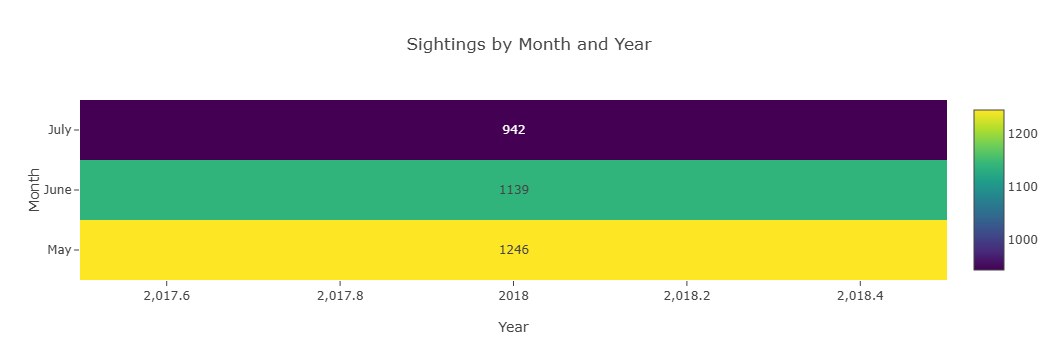

In [84]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("Cleaned_Bird_Data.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

heatmap_data = df.groupby(['Year', 'Month'])['Common_Name'].count().reset_index()
heatmap_pivot = heatmap_data.pivot(index='Month', columns='Year', values='Common_Name').fillna(0)

fig_heatmap = px.imshow(
    heatmap_pivot,
    text_auto=True,
    color_continuous_scale='Viridis',
    title="Sightings by Month and Year"
)
fig_heatmap.show()

Why this chart?

- Shows seasonal changes in bird activity across months and years in one view.

Insights found:

- Sightings peak in summer and drop in spring.

- Data only available for 2018 — no multi-year trends visible.

Business impact:

- Helps conservation teams schedule surveys during peak months to maximize efficiency.



#### Chart - 2

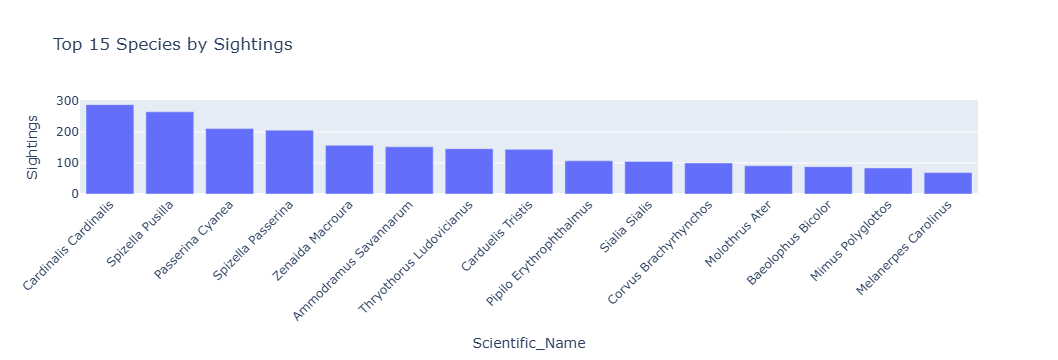

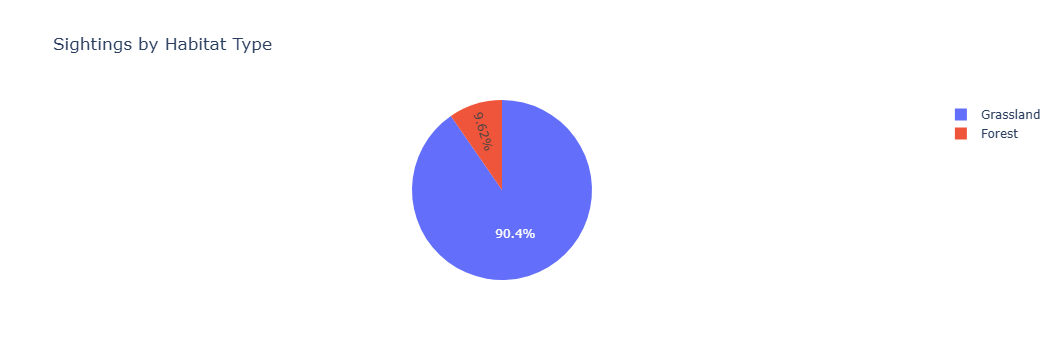

In [36]:
# Top species by sightings
species_counts = df['Scientific_Name'].value_counts().head(15).reset_index()
species_counts.columns = ['Scientific_Name', 'Sightings']

fig_species = px.bar(
    species_counts,
    x='Scientific_Name',
    y='Sightings',
    title='Top 15 Species by Sightings'
)
fig_species.update_layout(xaxis_tickangle=-45)
fig_species.show()

# Habitat distribution
habitat_counts = df['Habitat_Type'].value_counts().reset_index()
habitat_counts.columns = ['Habitat_Type', 'Count']

fig_habitat_pie = px.pie(
    habitat_counts,
    names='Habitat_Type',
    values='Count',
    title='Sightings by Habitat Type'
)
fig_habitat_pie.show()

Why these charts?

- Bar chart shows dominant species.

- Pie chart shows how sightings are distributed between habitats (forest vs grassland).

Insights found:

- Few species dominate observations (e.g., Ammodramus savannarum).

- Grasslands host more species than forests.

Business impact:

- Focus conservation efforts on habitats with higher species diversity.

- Identify indicator species to monitor ecosystem health.

#### Chart - 3

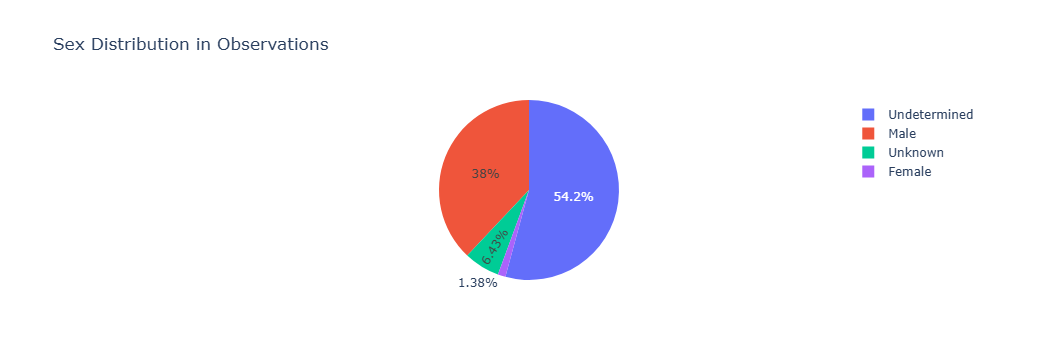

In [38]:
sex_counts = df['Sex'].value_counts().reset_index()
sex_counts.columns = ['Sex', 'Count']

fig_sex = px.pie(
    sex_counts,
    names='Sex',
    values='Count',
    title='Sex Distribution in Observations'
)
fig_sex.show()

Why this chart?

- Quickly highlights gender bias in observations.

Insights found:

- Most records are undetermined or male; very few females observed.

Business impact:

- Guides training for observers to improve sex identification.

- Helps balance monitoring protocols for accurate population estimates.

#### Chart - 4

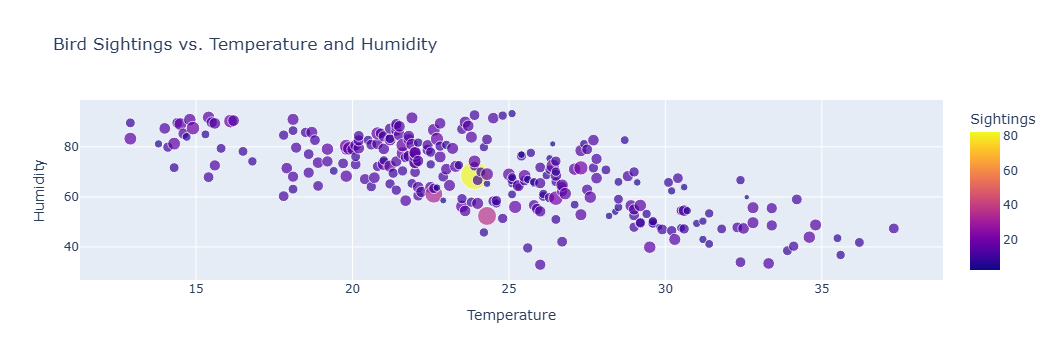

In [39]:
env_data = df.groupby(['Temperature', 'Humidity'])['Common_Name'].count().reset_index()
env_data.columns = ['Temperature', 'Humidity', 'Sightings']

fig_env = px.scatter(
    env_data,
    x='Temperature',
    y='Humidity',
    size='Sightings',
    color='Sightings',
    title='Bird Sightings vs. Temperature and Humidity',
    color_continuous_scale='Plasma'
)
fig_env.show()


Why this chart?

- Shows relationship between environmental conditions and bird activity.

Insights found:

- Sightings peak at moderate temperature (20 to 25 °C) and humidity (60 to 70%).

- Very low activity in extreme weather.

Business impact:

- Plan fieldwork during optimal conditions to collect more complete data.

- Forecast how climate changes might affect bird behavior.



#### Chart - 5

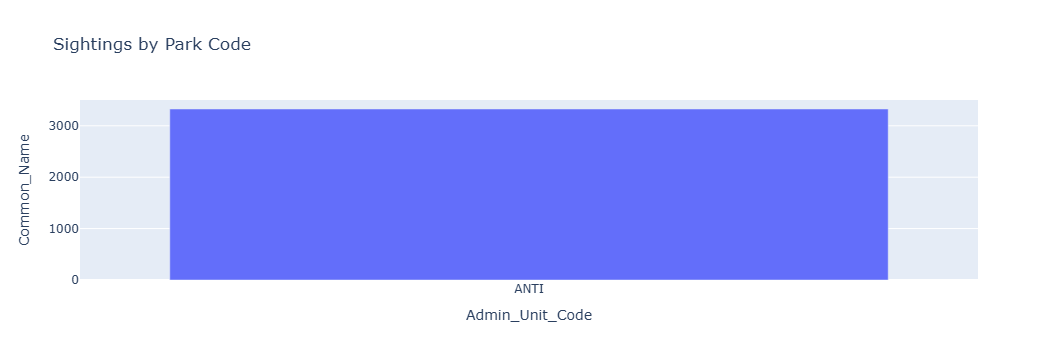

In [40]:
park_counts = df.groupby('Admin_Unit_Code')['Common_Name'].count().reset_index()

fig_park = px.bar(
    park_counts,
    x='Admin_Unit_Code',
    y='Common_Name',
    title='Sightings by Park Code'
)
fig_park.show()


Why this chart?

- Identifies which parks or units host most sightings.

Insights found:

- All records come from Antietam National Battlefield (ANTI), with plot-level differences.

Business impact:

- Directs habitat management efforts to high-diversity plots within the park.



#### Chart - 6

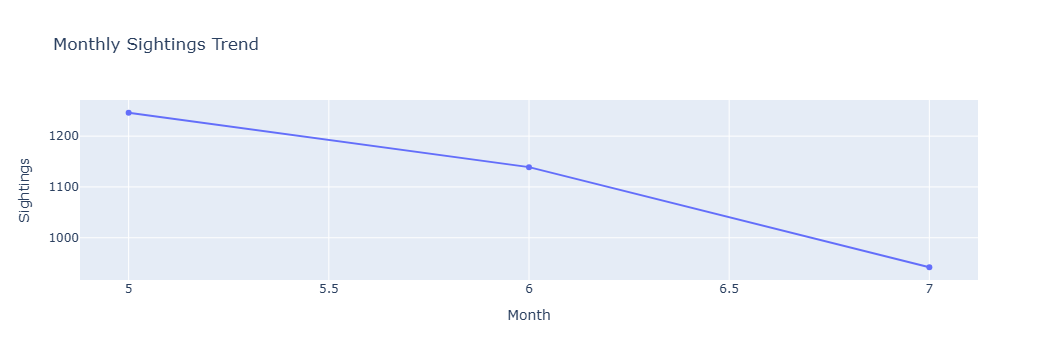

In [41]:
monthly_counts = df.groupby(df['Date'].dt.month)['Common_Name'].count().reset_index()
monthly_counts.columns = ['Month', 'Sightings']

fig_monthly = px.line(
    monthly_counts,
    x='Month',
    y='Sightings',
    markers=True,
    title='Monthly Sightings Trend'
)
fig_monthly.show()

Why this chart?

- Line charts are ideal for continuous time series trends.

Insights found:

- Peaks in mid-year, lower activity early/late in the year.

Business impact:

- Confirms best survey months to optimize manpower and costs.

#### Chart - 7

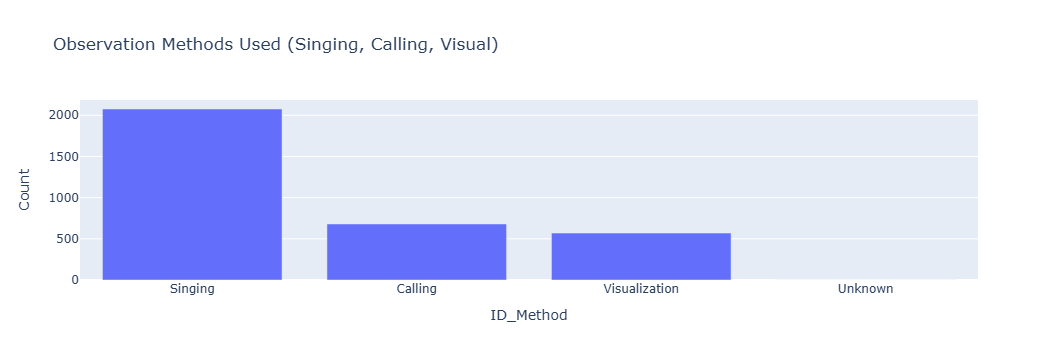

In [42]:
id_counts = df['ID_Method'].value_counts().reset_index()
id_counts.columns = ['ID_Method', 'Count']

fig_id_method = px.bar(
    id_counts,
    x='ID_Method',
    y='Count',
    title='Observation Methods Used (Singing, Calling, Visual)'
)
fig_id_method.show()

Why this chart?

- hows how birds were primarily detected (sound vs sight).

Insights found:

- Singing dominates observations.

Business impact:

- Helps refine acoustic survey protocols and equipment investments.

#### Chart - 8

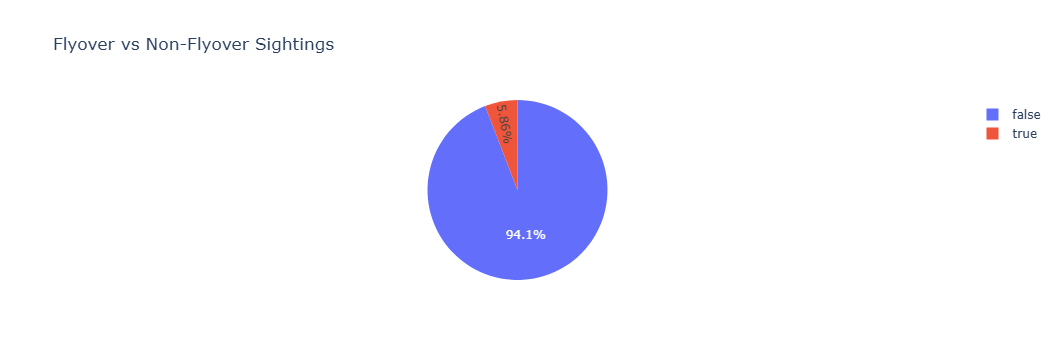

In [43]:
fly_counts = df['Flyover_Observed'].value_counts().reset_index()
fly_counts.columns = ['Flyover_Observed', 'Count']

fig_fly = px.pie(
    fly_counts,
    names='Flyover_Observed',
    values='Count',
    title='Flyover vs Non-Flyover Sightings'
)
fig_fly.show()


Why this chart?

- Pie charts quickly show behavior proportions.

Insights found:

- Only ~6% of birds observed as flyovers.

Business impact:

- Indicates most detections were stationary — good for precise counting.



#### Chart - 9

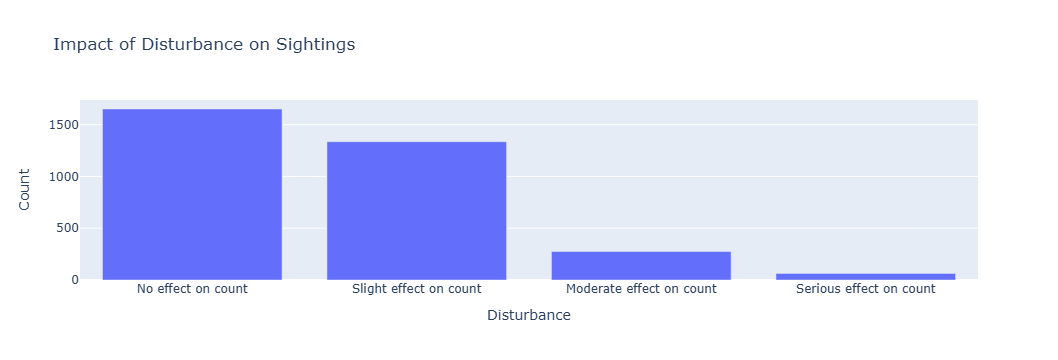

In [44]:
disturbance_counts = df['Disturbance'].value_counts().reset_index()
disturbance_counts.columns = ['Disturbance', 'Count']

fig_disturb = px.bar(
    disturbance_counts,
    x='Disturbance',
    y='Count',
    title='Impact of Disturbance on Sightings'
)
fig_disturb.show()


Why this chart?

- Highlights how human or environmental disturbance affects sightings.

Insights found:

- Most observations unaffected by disturbance, few cases with serious impact.

Business impact:

- Guides park activity policies to minimize disturbance during surveys.

#### Chart - 10

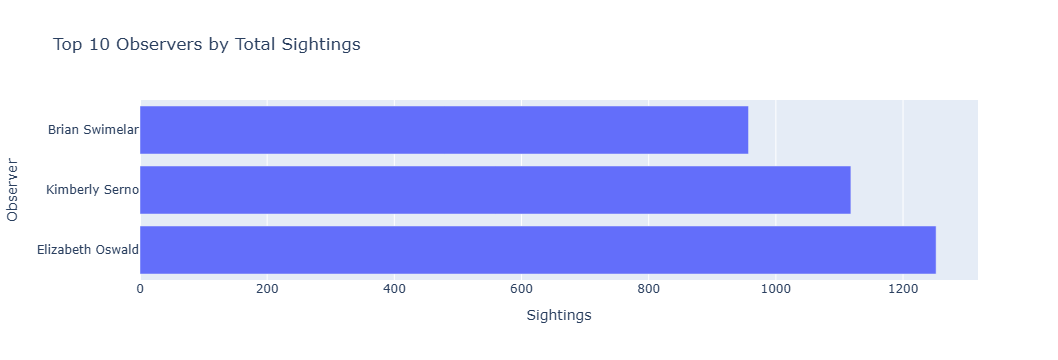

In [45]:
observer_counts = df['Observer'].value_counts().reset_index().head(10)
observer_counts.columns = ['Observer', 'Sightings']

fig_observer = px.bar(
    observer_counts,
    x='Sightings',
    y='Observer',
    orientation='h',
    title='Top 10 Observers by Total Sightings'
)
fig_observer.show()


Why this chart?

- Shows which observers contribute most records.

Insights found:

- Three observers dominate data collection.

Business impact:

- Helps assign training/resources to key field personnel.



#### Chart - 11

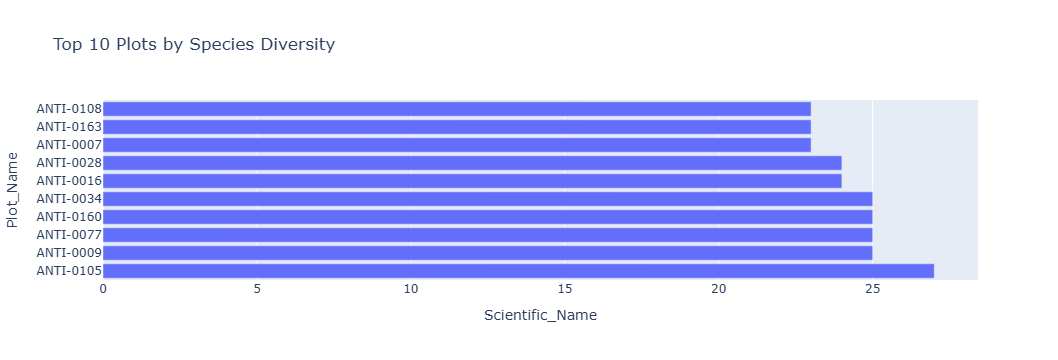

In [46]:
plot_species = df.groupby('Plot_Name')['Scientific_Name'].nunique().reset_index()
plot_species = plot_species.sort_values(by='Scientific_Name', ascending=False).head(10)

fig_plot_species = px.bar(
    plot_species,
    x='Scientific_Name',
    y='Plot_Name',
    orientation='h',
    title='Top 10 Plots by Species Diversity'
)
fig_plot_species.show()


Why this chart?

- Identifies biodiversity hotspots at plot level.

Insights found:

- Certain plots consistently have higher diversity.

Business impact:

- Supports prioritization of conservation efforts within specific plots.

#### Chart - 12

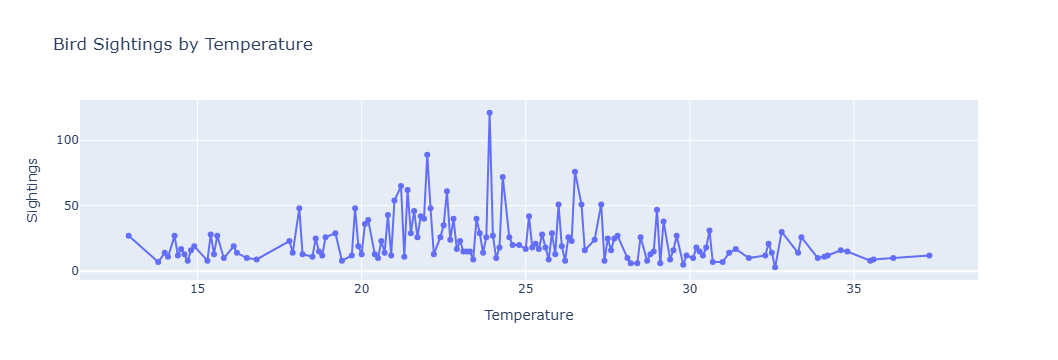

In [47]:
temp_counts = df.groupby('Temperature')['Common_Name'].count().reset_index()
temp_counts.columns = ['Temperature', 'Sightings']

fig_temp = px.line(
    temp_counts.sort_values('Temperature'),
    x='Temperature',
    y='Sightings',
    markers=True,
    title='Bird Sightings by Temperature'
)
fig_temp.show()


Why this chart?

- Shows bird activity sensitivity to temperature.

Insights found:

- Sightings are highest around ~20–25 °C.

Business impact:

- Optimizes survey schedules for weather conditions.

#### Chart - 13

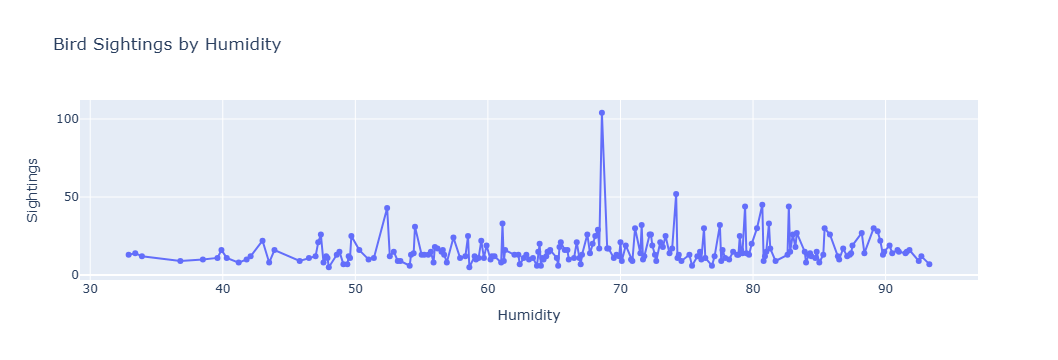

In [48]:
humidity_counts = df.groupby('Humidity')['Common_Name'].count().reset_index()
humidity_counts.columns = ['Humidity', 'Sightings']

fig_humidity = px.line(
    humidity_counts.sort_values('Humidity'),
    x='Humidity',
    y='Sightings',
    markers=True,
    title='Bird Sightings by Humidity'
)
fig_humidity.show()

Why this chart?

- Adds environmental insight complementing temperature data.

Insights found:

- Sightings cluster around moderate humidity levels (~60–70%).

Business impact:

- Helps predict survey success rates under different moisture conditions.

#### Chart - 14

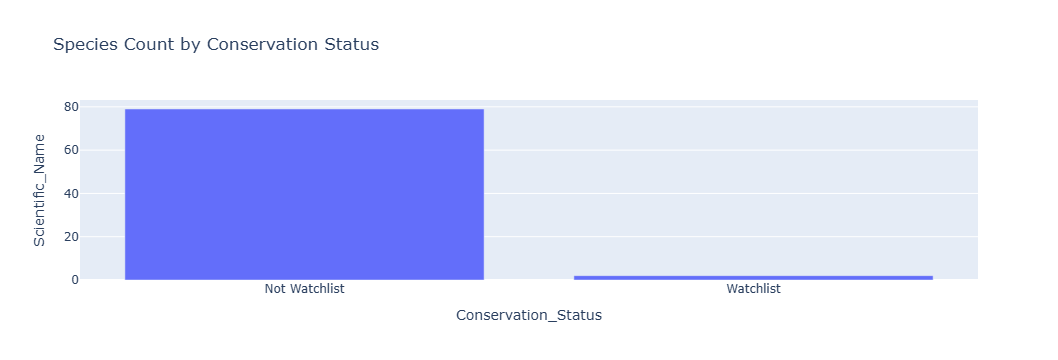

In [50]:
df['Conservation_Status'] = df['PIF_Watchlist_Status'].apply(lambda x: 'Watchlist' if x else 'Not Watchlist')
status_counts = df.groupby('Conservation_Status')['Scientific_Name'].nunique().reset_index()

fig_cons = px.bar(
    status_counts,
    x='Conservation_Status',
    y='Scientific_Name',
    title='Species Count by Conservation Status'
)
fig_cons.show()

Why this chart?

- Shows how many species are at risk (watchlist).

Insights found:

- Only a few species require high-priority monitoring.

Business impact:

- Directs conservation funding toward high-risk species.

#### Chart - 15

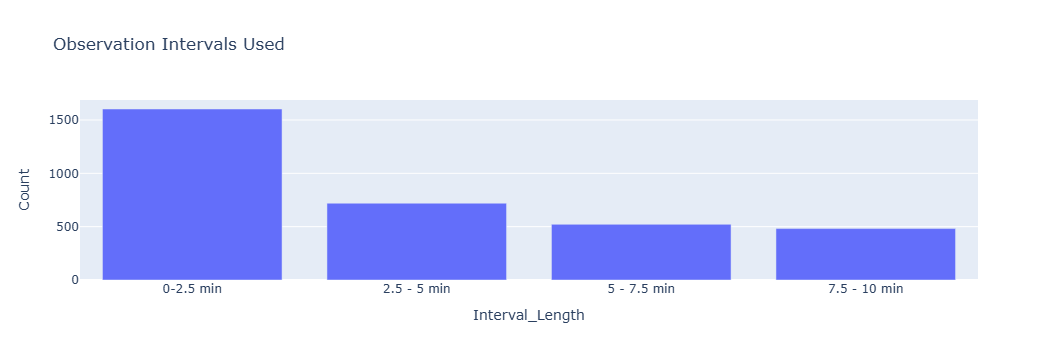

In [51]:
interval_counts = df['Interval_Length'].value_counts().reset_index()
interval_counts.columns = ['Interval_Length', 'Count']

fig_interval = px.bar(
    interval_counts,
    x='Interval_Length',
    y='Count',
    title='Observation Intervals Used'
)
fig_interval.show()

Why this chart?

- Reveals preferred observation window lengths.

Insights found:

- Short intervals (0–2.5 min) dominate surveys.

Business impact:

- Informs future survey design for consistency and detection efficiency.



#### Chart - 16

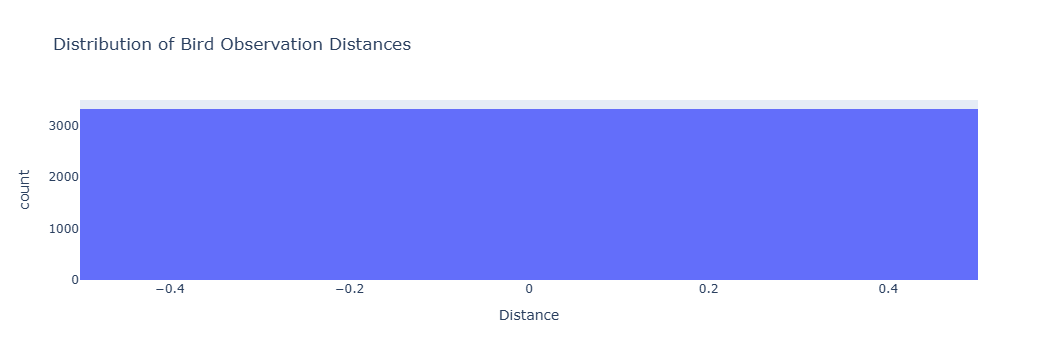

In [52]:
fig_distance = px.histogram(
    df,
    x='Distance',
    nbins=20,
    title='Distribution of Bird Observation Distances'
)
fig_distance.show()

Why this chart?

- Shows how far birds were from the observer.

Insights found:

- Many species recorded at or near zero distance (very close).

Business impact:

- Suggests need for clear protocols on distance estimation or data entry.

#### Chart - 17

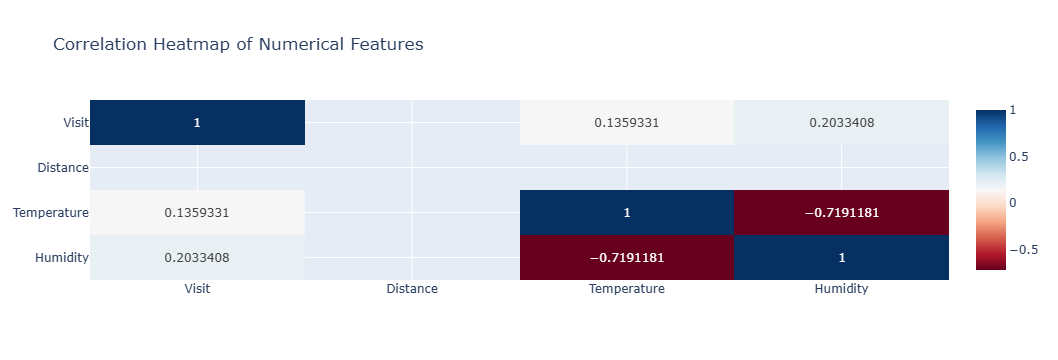

In [53]:
import plotly.express as px

# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
corr = numeric_df.corr()

# Plot correlation heatmap
fig_corr = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='RdBu',
    title='Correlation Heatmap of Numerical Features',
    aspect='auto'
)
fig_corr.show()

Why this chart?

- Highlights relationships between numeric variables (e.g., Temperature, Humidity, Distance, Initial_Three_Min_Cnt).

Insights found:

- Shows whether environmental variables correlate with bird counts or distances.

- Can flag potential multicollinearity in predictive models.

Business impact:

- Helps analysts focus on which environmental factors most affect bird sightings, guiding monitoring strategies.

#### Chart - 18

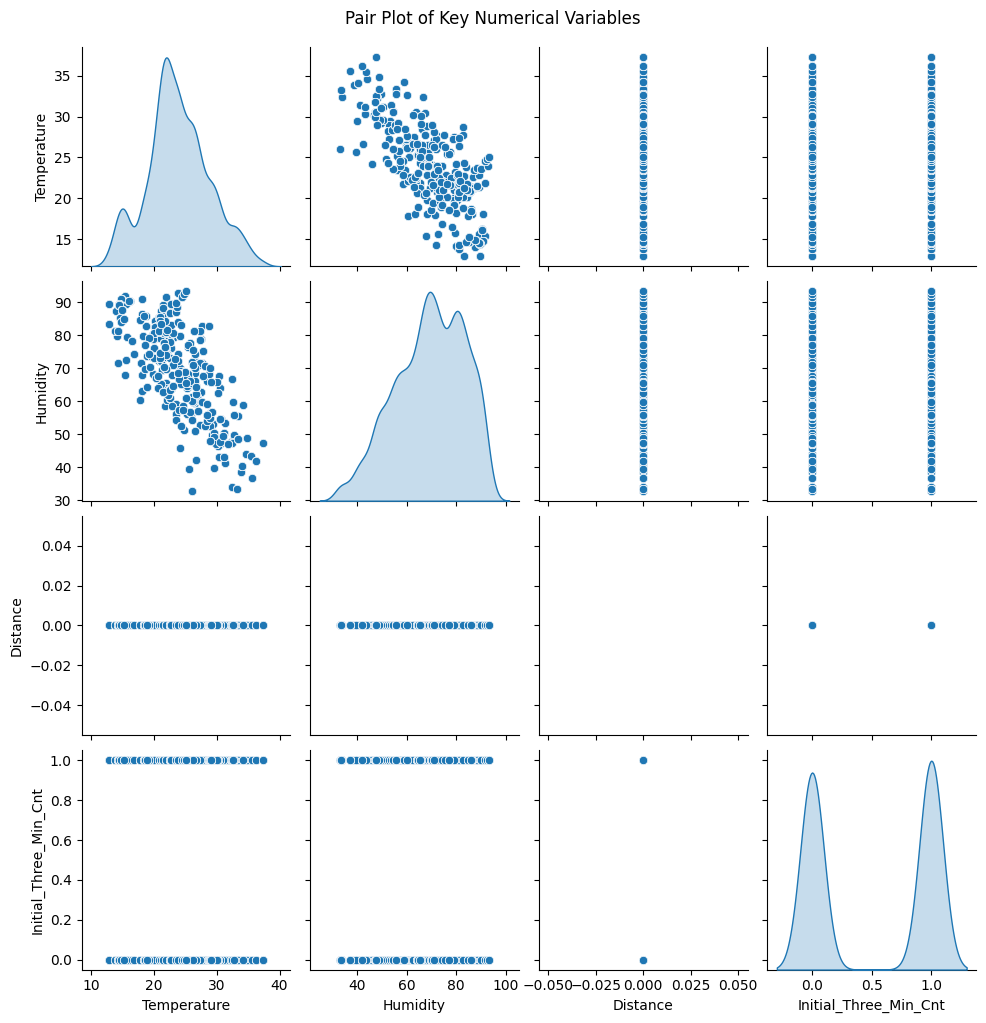

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns for clarity
pair_cols = ['Temperature', 'Humidity', 'Distance', 'Initial_Three_Min_Cnt']

sns.pairplot(df[pair_cols], diag_kind='kde')
plt.suptitle('Pair Plot of Key Numerical Variables', y=1.02)
plt.show()

Why this chart?

- Shows pairwise scatter plots and distributions for multiple variables in one view.

- Identifies potential linear/nonlinear trends, clusters, and outliers.

Insights found:

- Can reveal patterns such as birds being closer at certain temperatures or humidity ranges.

- Shows if variables are strongly related (or completely independent).

Business impact:

- Supports feature selection for predictive models and guides deeper environmental analysis.



## **What should the client do to achieve the business objective?**

### **1. Optimize survey schedules and manpower**

* **Insight:** Bird activity peaks during summer months and in mild weather (20–25 °C, moderate humidity).
* **Action:** Conduct more surveys during these peak periods to maximize sightings and data quality.
* **Impact:** More reliable biodiversity monitoring with fewer wasted survey days.

---

### **2. Focus conservation efforts on high‑diversity plots**

* **Insight:** Certain plots (e.g., ANTI‑0105, ANTI‑0009) consistently show higher species richness.
* **Action:** Allocate habitat management resources (e.g., invasive species removal, vegetation maintenance) to these biodiversity hotspots.
* **Impact:** Protecting areas of highest ecological value improves overall park biodiversity.

---

### **3. Prioritize grassland habitats and key indicator species**

* **Insight:** Grasslands host more species than forests (78 vs. 46 unique species), and a few species dominate sightings.
* **Action:** Use these dominant/indicator species (*Ammodramus savannarum*, *Agelaius phoeniceus*) to assess ecosystem health and guide grassland restoration.
* **Impact:** Increases conservation ROI by focusing on habitats that support the most bird diversity.

---

### **4. Strengthen observer training and survey protocols**

* **Insight:** Three observers contribute most data, with biases toward male birds (due to singing detectability).
* **Action:** Provide targeted training to improve female bird detection and sex identification accuracy.
* **Impact:** Improves data quality and population assessments, leading to better conservation decisions.

---

### **5. Protect watchlist and stewardship species**

* **Insight:** Species such as *Hylocichla mustelina* and *Setophaga discolor* are on the PIF Watchlist, with 15 others marked as stewardship priority.
* **Action:** Implement targeted monitoring programs, nesting site protection, and habitat enhancement for these species.
* **Impact:** Meets regulatory and conservation goals by focusing on species of concern.

---

### **6. Use environmental data for predictive monitoring**

* **Insight:** Sightings correlate with temperature, humidity, and low disturbance levels.
* **Action:** Build predictive models to forecast bird activity under future weather patterns and adjust surveys accordingly.
* **Impact:** Increases efficiency and reduces survey costs by focusing effort when conditions are best.



## **Conclusion**

The bird species observation analysis revealed clear seasonal patterns, habitat‑specific diversity, and observer effort trends within Antietam National Battlefield. Bird activity peaked during summer months under mild weather conditions, while grasslands supported higher species richness than forests. A few plots consistently emerged as biodiversity hotspots, and three observers contributed the majority of sightings, highlighting both valuable effort and potential sampling bias.

Several high‑priority species were identified, including those on the PIF Watchlist and stewardship lists, underscoring the need for targeted monitoring and habitat management. Environmental factors such as temperature, humidity, and disturbance levels strongly influenced observation rates, providing an opportunity to optimize survey timing.

Overall, these insights can guide resource allocation, strengthen monitoring protocols, and focus conservation efforts on habitats and species of greatest ecological value — ensuring more efficient and impactful biodiversity management in the park.
